In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import collections
import seaborn as sns
from math import *
from sklearn import cluster, datasets, mixture
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import knn as knn

<AxesSubplot:>

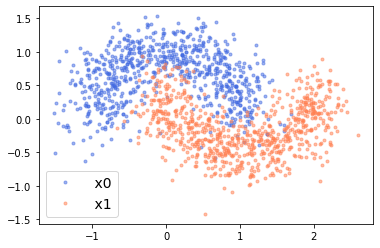

In [2]:
x, y = knn.generate_two_moon(1500, noise = 0.25)
knn.plot_result(x,y)

In [13]:
# global variable
N = 1500
d = 2
N_A = 10
N_test = 200
run = 100

def iterate(run, N_unlb, k1_B, k2_B, k1_AB, k2_AB):
    lb_pivotArr, unlb_pivotArr, mixed_pivotArr = [], [], [] # for ploting average heatmap
    for i in range(run):
        x, y = knn.generate_two_moon(N, noise = 0.25)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=N_test/N)
        perB=1-N_A/(N-N_test)
        X_A, x, y_A, y = train_test_split(X_train, y_train, test_size=perB, stratify=y_train)
        # store the best accuracy (re k) for different m, n
        best_A, best_B, best_mixed, acc_table, lb_pivot, unlb_pivot, mixed_pivot = knn.locate_max_accuracy(d, N_A, N_unlb, k1_B, k2_B, k1_AB, k2_AB, x, y, X_A, y_A, X_test, y_test, [])
        listA.append(best_A)
        listB.append(best_B)
        listMixed.append(best_mixed)
        listAcc.append(pd.DataFrame(acc_table))
        lb_pivotArr.append(lb_pivot)
        unlb_pivotArr.append(unlb_pivot)
        mixed_pivotArr.append(mixed_pivot)
    return lb_pivotArr, unlb_pivotArr, mixed_pivotArr

In [3]:
listA, listB, listMixed, listAcc = [], [], [], [] # for creating average chart

CPU times: user 3min 45s, sys: 953 ms, total: 3min 46s
Wall time: 3min 47s


array([<AxesSubplot:title={'center':'KNN with unlabelled data (N_A, N_B) = (10, 5), average across 500 simulations'}, xlabel='k1', ylabel='k2'>,
       <AxesSubplot:title={'center':'KNN with mixed data (N_A, N_B) = (10, 5), average across 500 simulations'}, xlabel='k1', ylabel='k2'>],
      dtype=object)

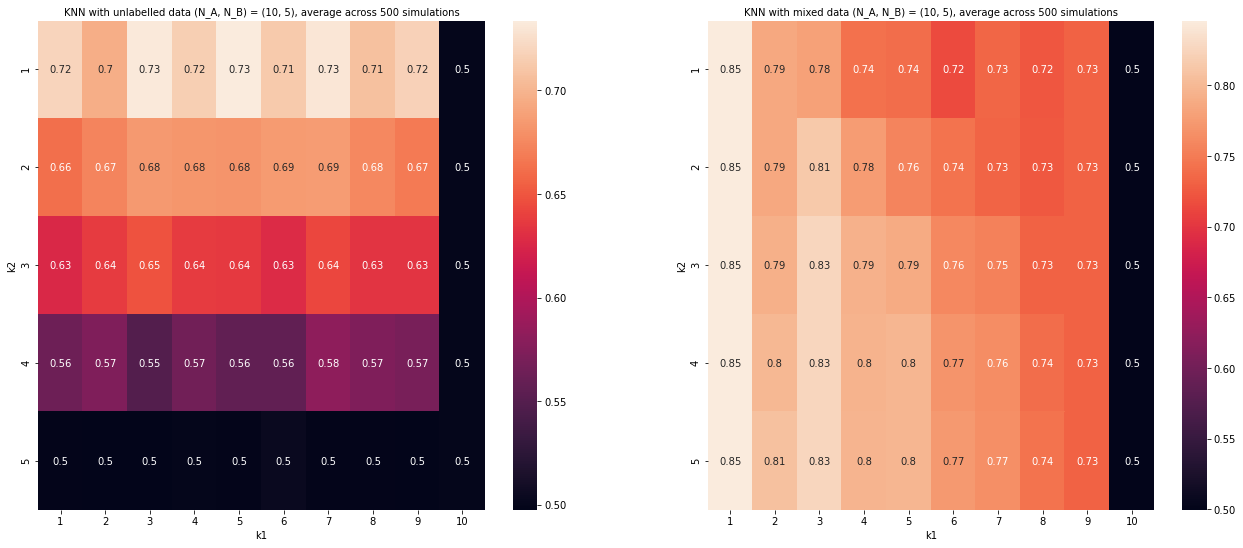

In [4]:
%%time
# listA[:run], listB[:run], listMixed[:run], listAcc[:run] = [], [], [], []
N_unlb = N_A//2
k1_B, k2_B = [k+1 for k in range(0,10)], [k+1 for k in range(0,5)]
k1_AB, k2_AB = [k+1 for k in range(0,10)], [k+1 for k in range(0,5)] #k2 just take all 12 numbers
hmA_1, hmB_1, hmAB_1 = iterate(run, N_unlb, k1_B, k2_B, k1_AB, k2_AB)

knn.plot_avr_heatmap(hmB_1, hmAB_1, N_A, N_unlb, run)

CPU times: user 9min 13s, sys: 1.51 s, total: 9min 14s
Wall time: 9min 16s


array([<AxesSubplot:title={'center':'KNN with unlabelled data (N_A, N_B) = (10, 10), average across 500 simulations'}, xlabel='k1', ylabel='k2'>,
       <AxesSubplot:title={'center':'KNN with mixed data (N_A, N_B) = (10, 10), average across 500 simulations'}, xlabel='k1', ylabel='k2'>],
      dtype=object)

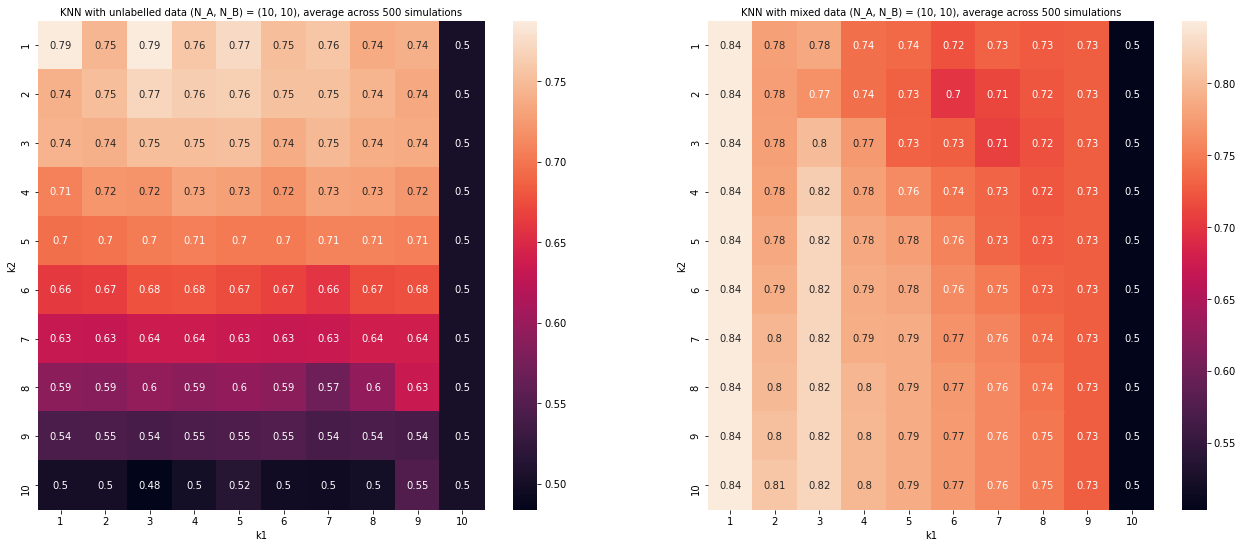

In [5]:
%%time
# listA[run:2*run], listB[run:2*run], listMixed[run:2*run], listAcc[run:2*run] = [], [], [], []
N_unlb = N_A
k1_B, k2_B = [k+1 for k in range(0,20)], [k+1 for k in range(0,10)]
k1_AB, k2_AB = [k+1 for k in range(0,20)], [k+1 for k in range(0,10)]
hmA_2, hmB_2, hmAB_2 = iterate(run, N_unlb, k1_B, k2_B, k1_AB, k2_AB)

knn.plot_avr_heatmap(hmB_2, hmAB_2, N_A, N_unlb, run)

CPU times: user 3h 41min 16s, sys: 15.1 s, total: 3h 41min 31s
Wall time: 3h 41min 51s


array([<AxesSubplot:title={'center':'KNN with unlabelled data (N_A, N_B) = (10, 100), average across 500 simulations'}, xlabel='k1', ylabel='k2'>,
       <AxesSubplot:title={'center':'KNN with mixed data (N_A, N_B) = (10, 100), average across 500 simulations'}, xlabel='k1', ylabel='k2'>],
      dtype=object)

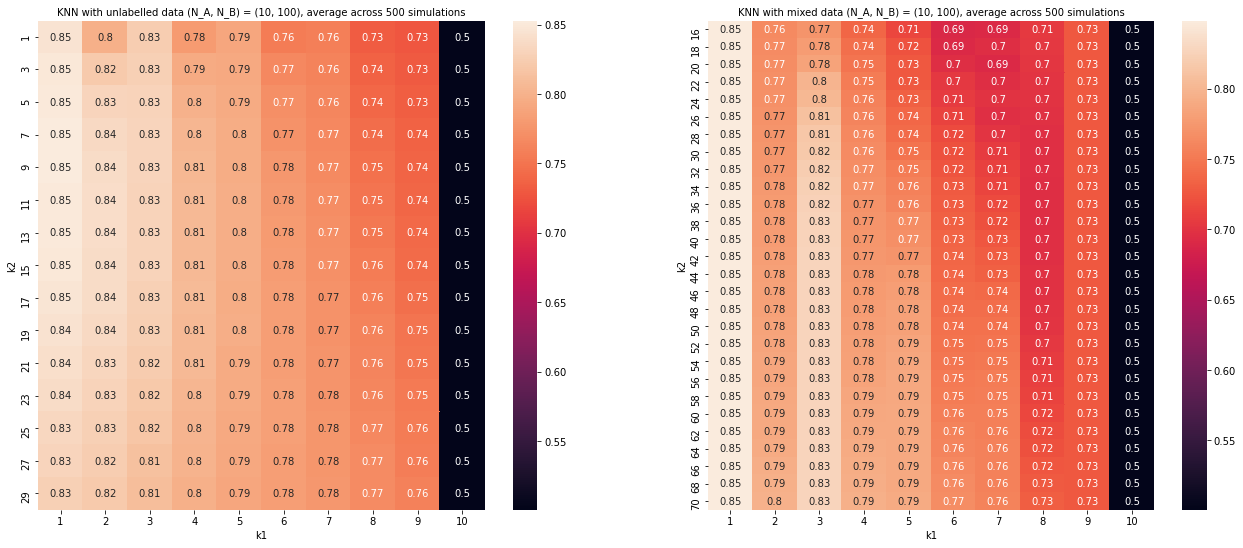

In [19]:
%%time
#listA[2*run:3*run], listB[2*run:3*run], listMixed[2*run:3*run], listAcc[2*run:3*run] = [], [], [], []
N_unlb = 100
k1_B, k2_B = [k+1 for k in range(0,10)], [k+1 for k in range(0,30,2)]
k1_AB, k2_AB = [k+1 for k in range(0,10)], [k+1 for k in range(15,70,2)]
hmA_3, hmB_3, hmAB_3 = iterate(run, N_unlb, k1_B, k2_B, k1_AB, k2_AB)

knn.plot_avr_heatmap(hmB_3, hmAB_3, N_A, N_unlb, run)

CPU times: user 51min 18s, sys: 11.8 s, total: 51min 30s
Wall time: 51min 53s


array([<AxesSubplot:title={'center':'KNN with unlabelled data (N_A, N_B) = (10, 500), average across 100 simulations'}, xlabel='k1', ylabel='k2'>,
       <AxesSubplot:title={'center':'KNN with mixed data (N_A, N_B) = (10, 500), average across 100 simulations'}, xlabel='k1', ylabel='k2'>],
      dtype=object)

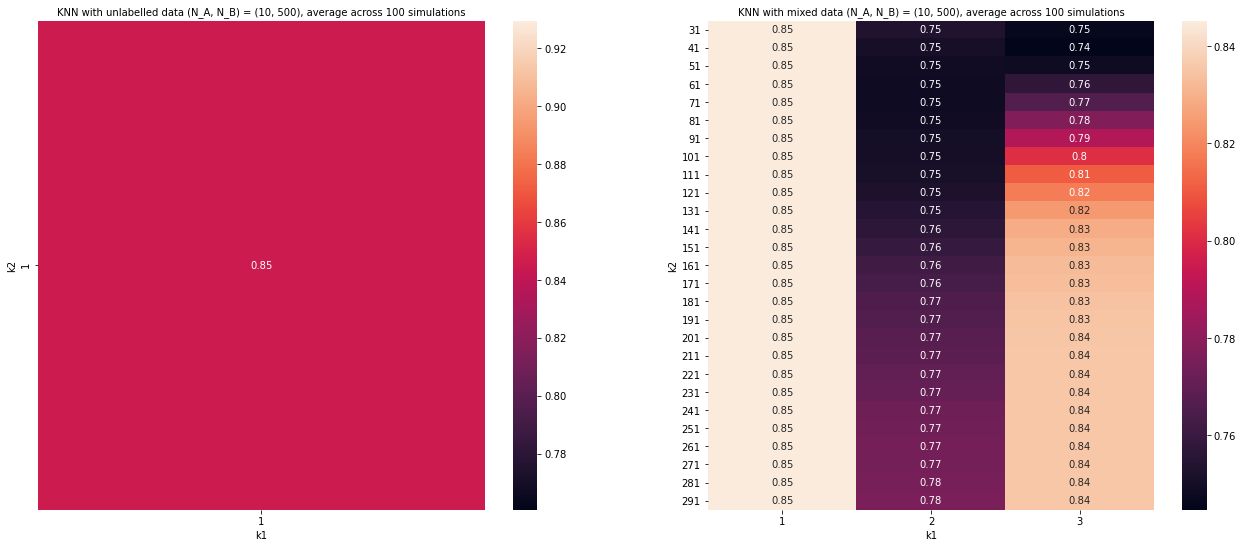

In [15]:
%%time
#listA[3*run:], listB[3*run:], listMixed[3*run:], listAcc[3*run:] = [], [], [], []
N_unlb = 500
k1_B, k2_B = [k+1 for k in range(0,1)], [k+1 for k in range(0,1)]
k1_AB, k2_AB = [k+1 for k in range(0,3)], [k+1 for k in range(30,300,10)]
hmA_4, hmB_4, hmAB_4 = iterate(run, N_unlb, k1_B, k2_B, k1_AB, k2_AB)

knn.plot_avr_heatmap(hmB_4, hmAB_4, N_A, N_unlb, run)

In [23]:
print("average accuracy table, unlabelled size = 5: ")
df = knn.avr_best_score(hmB_1, hmAB_1, hmA_1)
display(df)
display(df.var())
print("average accuracy table, unlabelled size = 20: ")
df = knn.avr_best_score(hmB_2, hmAB_2, hmA_2)
display(df)
display(df.var())
print("average accuracy table, unlabelled size = 100: ")
df = knn.avr_best_score(hmB_3, hmAB_3, hmA_3)
display(df)
display(df.var())
print("average accuracy table, unlabelled size = 500: ")
df = knn.avr_best_score(hmB_4, hmAB_4, hmA_4)
display(df)
display(df.var())

average accuracy table, unlabelled size = 5: 


,k1,k2,accuracy
0,1,NaN,0.84490
-1,5,1.0,0.72611
mixed,1,1.0,0.84490


k1          5.333333
k2          0.000000
accuracy    0.004704
dtype: float64

average accuracy table, unlabelled size = 20: 


,k1,k2,accuracy
0,1,NaN,0.84611
-1,1,1.0,0.79393
mixed,1,1.0,0.84611


k1          0.000000
k2          0.000000
accuracy    0.000908
dtype: float64

average accuracy table, unlabelled size = 100: 


,k1,k2,accuracy
0,1,NaN,0.84834
-1,1,9.0,0.85292
mixed,1,16.0,0.84834


k1           0.000000
k2          24.500000
accuracy     0.000007
dtype: float64

average accuracy table, unlabelled size = 500: 


,k1,k2,accuracy
0,1,NaN,0.84799
-1,1,45.0,0.85755
mixed,1,41.0,0.84799


k1          0.00000
k2          8.00000
accuracy    0.00003
dtype: float64

In [37]:
accuracy_summary = pd.concat(listAcc)
display(accuracy_summary.groupby(by="N_B").mean())
accuracy_summary.groupby(by="N_B").var()

,N_A,0,-1,lambda
N_B,,,,
5,10,0.86632,0.80987,0.87652
10,10,0.86691,0.86148,0.87798
100,10,0.86977,0.89755,0.87942
500,10,0.86483,0.88704,0.86692


,N_A,0,-1,lambda
N_B,,,,
5,0,0.002879,0.004905,0.002335
10,0,0.002591,0.002531,0.001993
100,0,0.002192,0.001812,0.001711
500,0,0.002626,0.002397,0.002328


In [27]:
stdA = pd.concat(listA).groupby(by="N_B").std()
stdA['k1'] = "±" + round(stdA['k1'],4).astype(str)
stdA['accuracy'] = "±" + round(stdA['accuracy'],4).astype(str)
stdA

,N_A,k1,accuracy
N_B,,,
5,0.0,±1.9374,±0.0537
10,0.0,±1.8973,±0.0509
100,0.0,±1.7472,±0.0468
500,0.0,±1.8216,±0.0512


In [34]:
def displayDF(listX):
    dfA = pd.concat(listX).groupby(by="N_B").mean()
    dfA['N_A'] = dfA['N_A'].astype(int)
    
    stdA = pd.concat(listX).groupby(by="N_B").std()
    stdA['k1'] = "±" + round(stdA['k1'],2).astype(str)
    dfA['accuracy'] = round(dfA['accuracy'],3)
    stdA['accuracy'] = "±" + round(stdA['accuracy'],2).astype(str)
    dfA = dfA.rename(columns={'N_B': 'N_u', 'N_A': 'N_l','k1':'k1 ± se.', 'accuracy': 'accuracy ± se.'})
    
    display(dfA)
    display(stdA)
displayDF(listA)
displayDF(listB)
displayDF(listMixed)

,N_l,k1 ± se.,accuracy ± se.
N_B,,,
5,10,2.232,0.866
10,10,2.252,0.867
100,10,2.132,0.870
500,10,2.092,0.865


,N_A,k1,accuracy
N_B,,,
5,0.0,±1.94,±0.05
10,0.0,±1.9,±0.05
100,0.0,±1.75,±0.05
500,0.0,±1.82,±0.05


,N_l,k1 ± se.,k2,accuracy ± se.
N_B,,,,
5,10,2.790,1.576,0.810
10,10,2.756,2.196,0.861
100,10,2.000,8.820,0.898
500,10,1.802,64.104,0.887


,N_A,k1,k2,accuracy
N_B,,,,
5,0.0,±2.33,0.915369,±0.07
10,0.0,±2.22,1.731930,±0.05
100,0.0,±1.56,7.330147,±0.04
500,0.0,±1.49,31.106211,±0.05


,N_l,k1 ± se.,k2,lambda,accuracy ± se.
N_B,,,,,
5,10,2.462,1.924,0.786333,0.877
10,10,2.542,3.184,1.262063,0.878
100,10,2.404,32.064,0.844356,0.879
500,10,2.024,71.664,1.527472,0.867


,N_A,k1,k2,lambda,accuracy
N_B,,,,,
5,0.0,±1.81,1.358645,0.699971,±0.05
10,0.0,±1.81,2.691586,1.347497,±0.04
100,0.0,±1.74,19.182383,0.700568,±0.04
500,0.0,±1.61,43.593760,1.435577,±0.05


In [32]:
dfA = pd.concat(listA).groupby(by="N_B").mean()
dfA['N_A'] = dfA['N_A'].astype(int)
dfA = dfA.rename(columns={'N_A': 'N_l ± se.', 'accuracy': 'accuracy ± se.'})
display(dfA)
stdA = pd.concat(listA).groupby(by="N_B").std()
stdA['k1'] = "±" + round(stdA['k1'],2).astype(str)
stdA['accuracy ± se.'] = "±" + round(stdA['accuracy'],2).astype(str)
display(stdA)

dfB = pd.concat(listB).groupby(by="N_B").mean()
dfB['N_A'] = dfB['N_A'].astype(int)
display(dfB)
stdB = pd.concat(listB).groupby(by="N_B").std()
stdB['k1'] = "±" + round(stdB['k1'],2).astype(str)
stdB['accuracy'] = "±" + round(stdB['accuracy'],2).astype(str)
display(stdB)

dfM = pd.concat(listMixed).groupby(by="N_B").mean()
dfM['N_A'] = dfM['N_A'].astype(int)
display(dfM)
stdM = pd.concat(listMixed).groupby(by="N_B").std()
stdM['k1'] = "±" + round(stdM['k1'],2).astype(str)
stdM['accuracy'] = "±" + round(stdM['accuracy'],2).astype(str)
display(stdM)

,N_A,k1,accuracy
N_B,,,
5,10,2.232,0.86632
10,10,2.252,0.86691
100,10,2.132,0.86977
500,10,2.092,0.86483


,N_A,k1,accuracy
N_B,,,
5,0.0,±1.94,±0.05
10,0.0,±1.9,±0.05
100,0.0,±1.75,±0.05
500,0.0,±1.82,±0.05


,N_A,k1,k2,accuracy
N_B,,,,
5,10,2.790,1.576,0.80987
10,10,2.756,2.196,0.86148
100,10,2.000,8.820,0.89755
500,10,1.802,64.104,0.88704


,N_A,k1,k2,accuracy
N_B,,,,
5,0.0,±2.33,0.915369,±0.07
10,0.0,±2.22,1.731930,±0.05
100,0.0,±1.56,7.330147,±0.04
500,0.0,±1.49,31.106211,±0.05


,N_A,k1,k2,lambda,accuracy
N_B,,,,,
5,10,2.462,1.924,0.786333,0.87652
10,10,2.542,3.184,1.262063,0.87798
100,10,2.404,32.064,0.844356,0.87942
500,10,2.024,71.664,1.527472,0.86692


,N_A,k1,k2,lambda,accuracy
N_B,,,,,
5,0.0,±1.81,1.358645,0.699971,±0.05
10,0.0,±1.81,2.691586,1.347497,±0.04
100,0.0,±1.74,19.182383,0.700568,±0.04
500,0.0,±1.61,43.593760,1.435577,±0.05


In [49]:
import knn as knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
N_A = 20
N_B = 500
x, y = knn.generate_two_moon(1500, noise = 0.25)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=N_test/N, random_state=42) #42
perB=1-N_A/(N-N_test)
X_A, X_B, y_A, y_B = train_test_split(X_train, y_train, test_size=perB, random_state=21, stratify=y_train) #2, 42
X_B, y_B = X_B[:N_B], y_B[:N_B]


labelled data size:  20
unlabelled data size:  500
Model A accuracy:  0.88
Model B accuracy:  0.91
Model C accuracy:  0.92


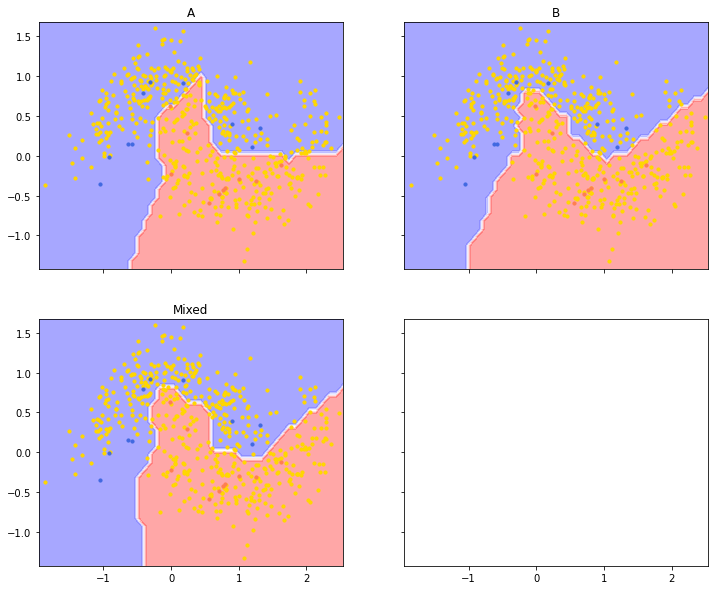

In [51]:
# Plotting decision regions
k1A, k1B, k2B, k1C, k2C=3,1,5,1,29
X, Y = np.concatenate((X_A,X_B), axis=0), np.concatenate((y_A,y_B), axis=0),
x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
X_all=np.c_[xx.ravel(), yy.ravel()]

# model A
A = knn.find_best_label(knn.assign_unlabelled(X_A, y_A, X_all, k1A))
AA = A.reshape(xx.shape)

# model B
B = knn.knn_B(k1B, k2B, X_A, y_A, X_B, X_all)
BB = B.reshape(xx.shape)
 
# model C
coef = ((N_B*k1C)/(N_A*k2C))**(2/d)
C = knn.knn_C(coef, k1C, k2C, X_A, y_A, X_B, X_all)
CC = C.reshape(xx.shape)

print("labelled data size: ", N_A)
print("unlabelled data size: ", N_B)
print("Model A accuracy: ", accuracy_score(knn.find_best_label(knn.assign_unlabelled(X_A, y_A, X_test, k1A)), y_test))
print("Model B accuracy: ", accuracy_score(knn.knn_B(k1B, k2B, X_A, y_A, X_B, X_test), y_test))
print("Model C accuracy: ", accuracy_score(knn.knn_C(coef, k1C, k2C, X_A, y_A, X_B, X_test), y_test))
f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(12, 10))
for idx, clf, tt in zip([(0,0), (0,1), (1,0)],
                        [AA,BB,CC],
                        ['A', 'B',
                         'Mixed']):

    axarr[idx[0], idx[1]].contourf(xx, yy, clf, alpha=0.4, cmap = 'bwr')
    axarr[idx[0], idx[1]].scatter(X_B[:, 0], X_B[:, 1], color='gold', s=10)                                  
    axarr[idx[0], idx[1]].scatter(X_A[y_A==0][:, 0], X_A[y_A==0][:, 1], c='royalblue',
                                  s=10)

    axarr[idx[0], idx[1]].scatter(X_A[y_A==1][:, 0], X_A[y_A==1][:, 1], c='coral',
                                  s=10)
    
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()